In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mino

In [4]:
raw = pd.read_csv('https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001423684&fileDetailSn=1&publicDataDetailPk=uddi:3dbe77c7-0f68-442f-9f63-f6b1a988d036_201801190911', engine='python')

In [5]:
raw.head()

,날짜,미세먼지농도 (㎍/㎥),결과
0,2017-01-10,19,좋음
1,2017-01-11,20,좋음
2,2017-01-13,29,좋음
3,2017-01-14,40,보통
4,2017-01-20,20,좋음


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
날짜               250 non-null object
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [9]:
raw['날짜']=pd.to_datetime(raw['날짜']) ## astype보다 이걸 쓰면 쉽다.

In [ ]:
raw['날짜'].resample()
## type에 따라 resample이 되고 안되고 한다.

--------------

In [29]:
import datetime

In [38]:
date = datetime.datetime(2018, 7 ,30)

In [39]:
date.strftime('%Y year %A',) # datetime을 string으로

'2018 year Monday'

In [32]:
type(pd.to_datetime('7 30 2018'))

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
issubclass(pd.Timestamp, datetime.datetime)
# 파이썬 datetime을 상속받아 확장시켰다.
# 따라서, 파이썬 문법 써야 한다

True

In [35]:
issubclass(pd.Timedelta, datetime.timedelta)

True

In [40]:
date + pd.to_timedelta(-4, 'W')
# 파이썬 연산이 가능하다

datetime.datetime(2018, 7, 2, 0, 0)

In [36]:
t = pd.to_datetime(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
type(t)

## 데이터를 한 개 넣었을 때, 여러개 넣을 때 결과가 다르다.
## index로 바꾸면 resample 할 수 있다.

pandas.core.indexes.datetimes.DatetimeIndex

----------------------------

In [43]:
dust = raw.set_index('날짜', drop=True)
dust.head()

,미세먼지농도 (㎍/㎥),결과
날짜,,
2017-01-10,19,좋음
2017-01-11,20,좋음
2017-01-13,29,좋음
2017-01-14,40,보통
2017-01-20,20,좋음


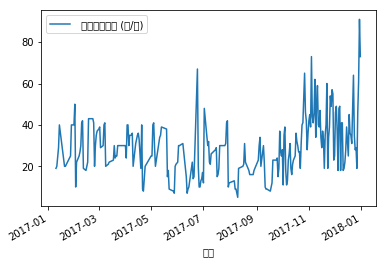

In [45]:
dust.plot.line();

In [47]:
dust.info() # index가 datetimeindex로 바뀜

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2017-01-10 to 2017-12-31
Data columns (total 2 columns):
 미세먼지농도 (㎍/㎥)    250 non-null int64
결과               250 non-null object
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


# resample

In [52]:
dust['2017-03':'2017-06'].sample(10)
## 인덱싱이 된다...!! iloc쓰지 않는데도

,미세먼지농도 (㎍/㎥),결과
날짜,,
2017-06-01,22,좋음
2017-04-14,33,보통
2017-06-19,14,좋음
2017-04-24,20,좋음
2017-04-22,8,좋음
2017-03-06,30,좋음
2017-06-13,9,좋음
2017-03-21,25,좋음
2017-06-28,13,좋음


In [56]:
dust.index.resample('3D')

AttributeError: 'DatetimeIndex' object has no attribute 'resample'

------------------------

In [54]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series
## series의 index가 datetimeindex이면 resample가능

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [57]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

---------------------------
왜 datetime은 numpy아닌 python에서 가져왔냐?

In [58]:
date = np.array('2015-07-04', dtype=np.datetime64)
date
## numpy는 datetime에 대한 지원이 별로 없다.
## 통일성을 위해 타입 이름은 np에서 가져왔다.

array('2015-07-04', dtype='datetime64[D]')

In [59]:
date + np.arange(12)
# numpy는 homogeneous하다 -> 유용할거야

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [63]:
b = np.datetime64('2015-07-04')
isinstance(b, datetime.date)
## numpy는 python datetime object 가져오지 않았따.

False

In [64]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')
# numpy는 international standard만 따른다

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [65]:
t

DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'], dtype='datetime64[ns]', freq=None)

In [68]:
t.loc['2014-07']

AttributeError: 'DatetimeIndex' object has no attribute 'loc'

In [69]:
data = pd.Series([0,1,2,3], index=t)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [70]:
data['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

In [71]:
data.loc['2014']

2014-07-04    0
2014-08-04    1
dtype: int64

In [73]:
data.iloc[0:3]

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

# fbProphet 
- facebook에서 공개한 시계열 분석 프레임워크
- R과 python 모두 지원
- Pandas기반으로 시계열 분석

In [9]:
# !pip install fbprophet

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [11]:
from fbprophet import Prophet

In [12]:
m = Prophet()

In [13]:
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
vars(m)

{'growth': 'linear', 'changepoints': 93     2008-03-17
 186    2008-06-20
 279    2008-10-11
 372    2009-01-14
 465    2009-04-17
 558    2009-07-19
 650    2009-10-26
 743    2010-01-31
 836    2010-05-06
 929    2010-08-14
 1022   2010-11-15
 1115   2011-02-16
 1208   2011-05-20
 1301   2011-08-21
 1394   2011-11-24
 1487   2012-02-27
 1580   2012-05-31
 1673   2012-09-01
 1765   2012-12-02
 1858   2013-03-05
 1951   2013-06-06
 2044   2013-09-08
 2137   2013-12-10
 2230   2014-03-14
 2323   2014-06-15
 Name: ds, dtype: datetime64[ns], 'n_changepoints': 25, 'specified_changepoints': False, 'changepoint_range': 0.8, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'holidays': None, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10.0, 'mcmc_samples': 0, 'interval_width': 0.8, 'uncertainty_samples': 1000, 'start': Timestamp('2007-12-10 00:00:00'), 'y_scale': 12.84674688882

In [15]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [16]:
vars(future)

{'_is_copy': None, '_data': BlockManager
 Items: Index(['ds'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=3270, step=1)
 DatetimeBlock: slice(0, 1, 1), 1 x 3270, dtype: datetime64[ns], '_item_cache': {}}

In [17]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2007-12-10,8.842529,8.205278,9.438983
1,2007-12-11,8.591074,7.971828,9.182509
2,2007-12-12,8.386909,7.770587,9.009859
3,2007-12-13,8.364808,7.739363,8.946143
4,2007-12-14,8.352801,7.753665,8.930870
5,2007-12-15,8.098104,7.430647,8.732325
6,2007-12-16,8.447997,7.855459,9.057112
7,2007-12-17,8.744579,8.112713,9.378600
8,2007-12-18,8.507396,7.867802,9.085277
9,2007-12-19,8.319564,7.679518,8.919249


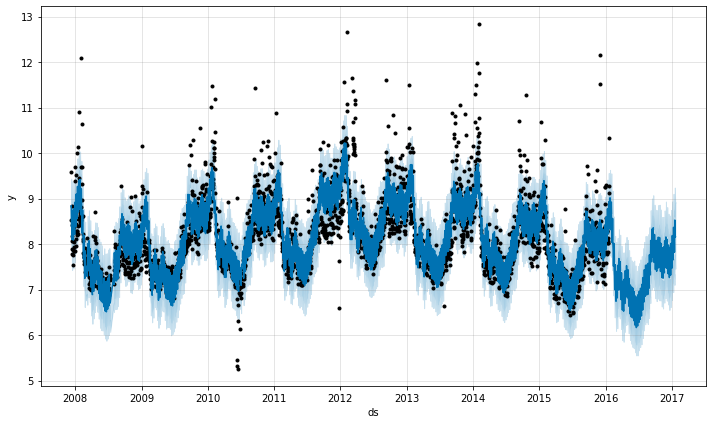

In [18]:
figi = m.plot(forecast)

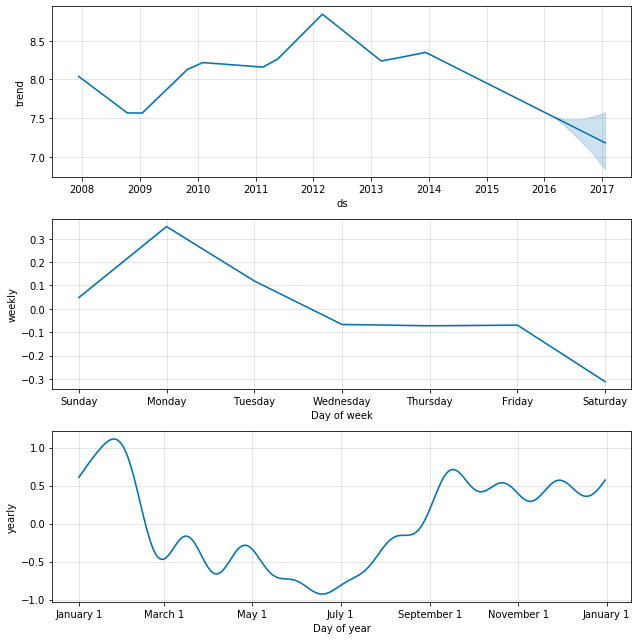

In [20]:
m.plot_components(forecast);